In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2 as cv
import tensorflow as tf
import keras

from keras.preprocessing import image
from keras.models import Sequential 
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization, Activation, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset/emotion/fer2013.csv')
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
data.shape

(35887, 3)

In [ ]:
data['emotion'].unique()

array([0, 2, 4, 6, 3, 5, 1])

In [ ]:
len(data.iloc[0]['pixels'].split())

2304

In [ ]:
label_map = ['Marah', 'Bosan', 'Malas', 'Senang', 'Sedih', 'Terkejut']

In [ ]:
data = data[data.emotion != 1]

In [ ]:
data['emotion'].nunique()

6

0 = Marah

1 = Disgust //yang ini dihapus

2 = Malas

3 = Senang

4 = Sedih

5 = Terkejut

6 = Bosan

In [ ]:
data['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
Name: emotion, dtype: int64

In [ ]:
image = data.iloc[0]['pixels'].split()

In [ ]:
image = [int(i) for i in image]

In [ ]:
image = np.array(image)

In [ ]:
image = image.reshape(48,48)

In [ ]:
X = []
y = []

def getData(path):
    Marah = 0
    Malas = 0
    Sedih = 0
    Senang = 0
    Terkejut = 0
    Bosan = 0
    data = pd.read_csv(path)
    
    X = []
    y = []    
    
    for i in range(len(data)):
        if data.iloc[i]['emotion'] != 1:
            if data.iloc[i]['emotion'] == 0:
                if Marah <= 4500:            
                    y.append(data.iloc[i]['emotion'])
                    im = data.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    Marah += 1
                else:
                    pass
                
            if data.iloc[i]['emotion'] == 2:
                if Malas <= 5000:            
                    y.append(data.iloc[i]['emotion'])
                    im = data.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    Malas += 1
                else:
                    pass
                
            if data.iloc[i]['emotion'] == 3:
                if Senang <= 8500:            
                    y.append(data.iloc[i]['emotion'])
                    im = data.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    Senang += 1
                else:
                    pass
                
            if data.iloc[i]['emotion'] == 4:
                if Sedih <= 6000:            
                    y.append(data.iloc[i]['emotion'])
                    im = data.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    Sedih += 1
                else:
                    pass
                
            if data.iloc[i]['emotion'] == 5:
                if Terkejut <= 4000:            
                    y.append(data.iloc[i]['emotion'])
                    im = data.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    Terkejut += 1
                else:
                    pass
                
            if data.iloc[i]['emotion'] == 6:
                if Bosan <= 6000:            
                    y.append(data.iloc[i]['emotion'])
                    im = data.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    Bosan += 1
                else:
                    pass

    return X, y  

In [ ]:
X, y = getData('/content/drive/MyDrive/dataset/emotion/fer2013.csv')

In [ ]:
np.unique(y, return_counts=True)

(array([0, 2, 3, 4, 5, 6]), array([4501, 5001, 8501, 6001, 4001, 6001]))

In [ ]:
X = np.array(X)/255.0
y = np.array(y)

In [ ]:
y1 = []
for i in y:
    if i != 6:
        y1.append(i)
        
    else:
        y1.append(1)

In [ ]:
np.unique(y1, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([4501, 6001, 5001, 8501, 6001, 4001]))

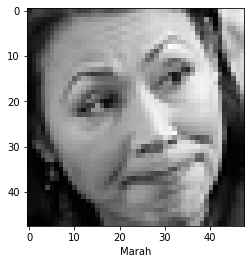

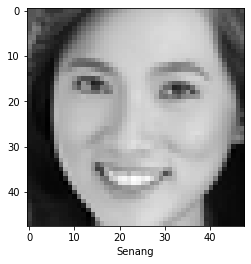

In [ ]:
for i in range(2):
    random_img = np.random.randint((1), 24000, 1)[0]
    plt.figure()
    plt.imshow(X[random_img].reshape(48,48), cmap='gray')
    plt.xlabel(label_map[y1[random_img]])

In [ ]:
X = X.reshape(len(X), 48, 48, 1)

In [ ]:
from keras.utils import to_categorical
y2 = to_categorical(y1, num_classes=6)

CNN ARCHITECTURE

In [ ]:
model = Sequential()

model.add(Conv2D(64,(5,5),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

model.add(Conv2D(512,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(6, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate=0.0001, decay=1e-6))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1664      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1, 
                              restore_best_weights=True,mode='max',patience = 10),
                              ModelCheckpoint('cnn_best1.h5',monitor='val_accuracy',verbose=1,
                              save_best_only=True,mode='max')]
                              
history = model.fit(X, 
                    y2, 
                    epochs=70, 
                    batch_size=64, 
                    callbacks=checkpointer,
                    shuffle=True, 
                    validation_split=0.2)

Epoch 1/70
426/426 [==============================] - ETA: 0s - loss: 1.8007 - accuracy: 0.2979
Epoch 1: val_accuracy improved from -inf to 0.28903, saving model to cnn_best1.h5
426/426 [==============================] - 20s 27ms/step - loss: 1.8007 - accuracy: 0.2979 - val_loss: 1.9069 - val_accuracy: 0.2890
Epoch 2/70
426/426 [==============================] - ETA: 0s - loss: 1.6034 - accuracy: 0.3768
Epoch 2: val_accuracy improved from 0.28903 to 0.38621, saving model to cnn_best1.h5
426/426 [==============================] - 11s 27ms/step - loss: 1.6034 - accuracy: 0.3768 - val_loss: 1.6066 - val_accuracy: 0.3862
Epoch 3/70
424/426 [============================>.] - ETA: 0s - loss: 1.4940 - accuracy: 0.4140
Epoch 3: val_accuracy improved from 0.38621 to 0.44266, saving model to cnn_best1.h5
426/426 [==============================] - 11s 27ms/step - loss: 1.4944 - accuracy: 0.4139 - val_loss: 1.4055 - val_accuracy: 0.4427
Epoch 4/70
426/426 [==============================] - ETA: 0s

akurasi terbaik = 62.11%

nama model = cnn_best1.h5

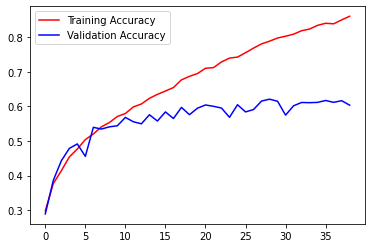

In [ ]:
def acc_plot(history):
  plt.plot(history.history['accuracy'],'r', label='Training Accuracy')
  plt.plot(history.history['val_accuracy'],'b', label='Validation Accuracy')
  plt.legend()

acc_plot(history)

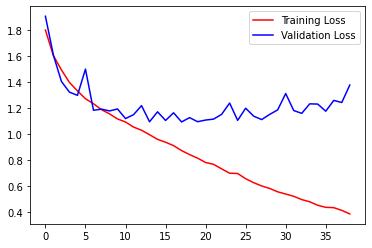

In [ ]:
def loss_plot(history):
  plt.plot(history.history['loss'],'r', label='Training Loss')
  plt.plot(history.history['val_loss'],'b', label='Validation Loss')
  plt.legend()

loss_plot(history)

In [ ]:
model_to_json = model.to_json()

with open('model.json','w') as json_file :
    json_file.write(model_to_json)